### Load Modules

In [1]:
# import ML models
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
import os
from scipy.stats import skew
import sklearn.model_selection as ms
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost
import warnings
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, LabelEncoder


### Load Data

In [2]:


os.chdir(r"C:\Users\jtlqh\bootcamp\my_projects\kaggle")

train = pd.read_csv("./train.csv")
test=pd.read_csv("./test.csv")

### EDA

In [3]:
print(train.shape)
print(test.shape)


(1460, 81)
(1459, 80)


In [4]:
print(train.columns)
train.info()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df=pd.concat([train.iloc[:,:-1],test], ignore_index=True)
df.shape

(2919, 80)

In [6]:
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 100)

df.head(5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


From heatmap chart, we can see SalePrice is highly correlated with OverallQual and GrLivArea

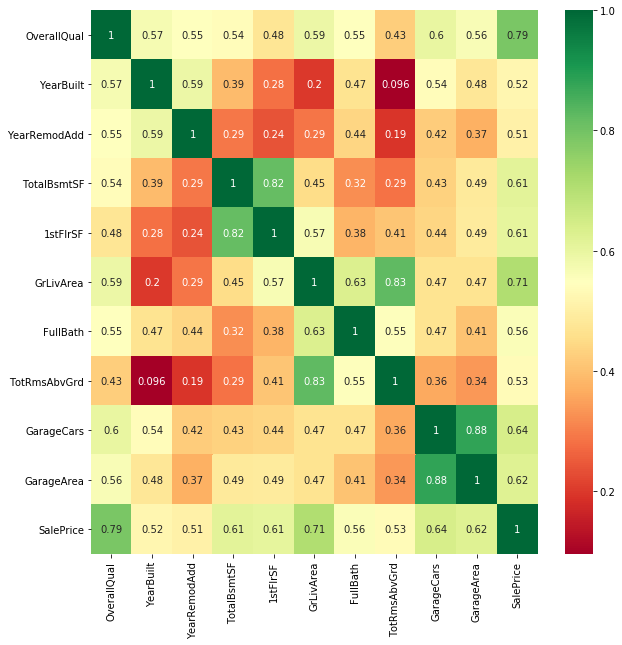

In [7]:

plt.rcParams['figure.figsize']= [10.0, 10.0]
corr=train.corr()
sns.heatmap(train[corr[corr['SalePrice'].abs()>0.5].index].corr(),annot=True,cmap="RdYlGn")



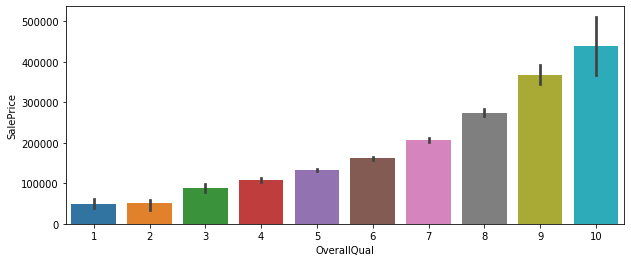

In [8]:
plt.rcParams['figure.figsize']= [10.0, 4.0]
sns.barplot(train.OverallQual, train.SalePrice)

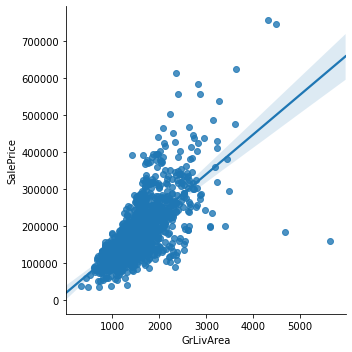

In [9]:
# checking for outlier

sns.lmplot(x='GrLivArea', y= 'SalePrice', data=train)


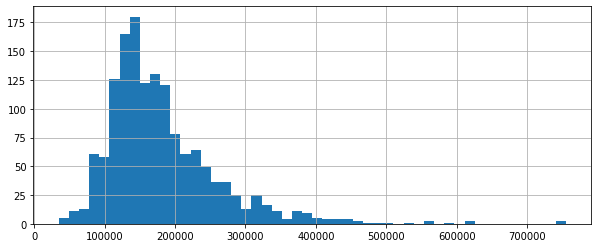

In [10]:
train.SalePrice.hist(bins=50)

In [11]:
outliers = train[(train.GrLivArea>4000 ) & (train.SalePrice<300000)].index
outliers

Int64Index([523, 1298], dtype='int64')

PoolQC, MiscFeature, Alley, Fence, FireplaceQu have large number of missingness

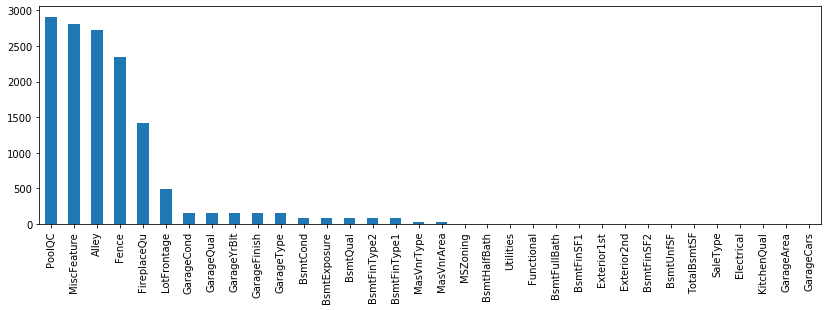

In [12]:
plt.rcParams['figure.figsize']= [14.0, 4.0]
missing=df.isna().sum().sort_values(ascending=False)
missing[missing>0].plot(kind='bar')

### Feature Engineering

In [13]:
garage_list = [i for i in df.columns if str(i).startswith("Garage")]
print(df[garage_list].info())
df[df['GarageCond'].isna()][garage_list].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 7 columns):
GarageType      2762 non-null object
GarageYrBlt     2760 non-null float64
GarageFinish    2760 non-null object
GarageCars      2918 non-null float64
GarageArea      2918 non-null float64
GarageQual      2760 non-null object
GarageCond      2760 non-null object
dtypes: float64(3), object(4)
memory usage: 159.8+ KB
None


,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0.0,0.0,NaN,NaN
48,NaN,NaN,NaN,0.0,0.0,NaN,NaN
78,NaN,NaN,NaN,0.0,0.0,NaN,NaN
88,NaN,NaN,NaN,0.0,0.0,NaN,NaN
89,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [14]:
for i in garage_list:    
    if df[i].dtypes !='float64': df[i].fillna("None", inplace=True)
    else: df[i].fillna(0, inplace=True)


In [15]:
# fill LotFrontage missings with median value in the same neighborhood

df['LotFrontage'] = df[['Neighborhood','LotFrontage']].groupby('Neighborhood').transform(lambda x: x.fillna(x.median()))


for i in ['MiscFeature','Fence','PoolQC','Alley','FireplaceQu']:
    df[i].fillna("None", inplace=True)   

# impute MSZoning missings as the most frequent value in the same MSSubClass
df['MSZoning'] = df[['MSSubClass', 'MSZoning']].groupby('MSSubClass').transform(lambda x: x.fillna(x.mode()[0]))

df['Utilities'].fillna(df['Utilities'].mode()[0], inplace=True)

df['Exterior1st'].fillna('Wd Sdng',inplace=True)
df['Exterior2nd'].fillna('Wd Sdng',inplace=True)

#### Basement missing data are not at random
Peeking into the basement related columns, it is resonable to impute BsmtQual missings with the same BsmtCond non-empty values.

In [16]:
df['BsmtQual'].fillna(df['BsmtCond'],inplace=True)

bsmt_list = [i for i in df.columns if "Bsmt" in i]
print(df[bsmt_list].info())

for i in bsmt_list:    
    if df[i].dtypes !='float64': df[i].fillna("None", inplace=True)
    else: df[i].fillna(0, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 11 columns):
BsmtQual        2840 non-null object
BsmtCond        2837 non-null object
BsmtExposure    2837 non-null object
BsmtFinType1    2840 non-null object
BsmtFinSF1      2918 non-null float64
BsmtFinType2    2839 non-null object
BsmtFinSF2      2918 non-null float64
BsmtUnfSF       2918 non-null float64
TotalBsmtSF     2918 non-null float64
BsmtFullBath    2917 non-null float64
BsmtHalfBath    2917 non-null float64
dtypes: float64(6), object(5)
memory usage: 251.0+ KB
None


In [17]:
df['Electrical']=df.groupby('Neighborhood')['Electrical'].transform(lambda x: x.fillna(x.mode()[0]))
df['KitchenQual']=df.groupby('Neighborhood')['KitchenQual'].transform(lambda x: x.mode()[0])

df['MasVnrType'].fillna('None', inplace=True)
df['MasVnrArea'].fillna(0, inplace=True)

df['Functional'].fillna(df['Functional'].mode()[0], inplace=True)

df['SaleType'].fillna(df['SaleType'].mode()[0], inplace=True)

In [18]:
df.isna().any().sum()

# checking is there is any more missing entries

0

In [19]:

df['TotalSF'] =df[['1stFlrSF', '2ndFlrSF', 'TotalBsmtSF']].sum(axis=1)

Some features can be converted from numerical to categorical values

In [20]:
for i in ['MSSubClass', 'OverallCond', 'YrSold', 'MoSold']:
    df[i] = df[i].astype(str)

In [21]:
# label encode on categorical features having more than 3 unique values 
cols = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold']

for i in cols:
    label = LabelEncoder()
    label.fit(df[i].values.tolist())
    df[i] = label.transform(df[i].values.tolist())

df[cols].head()

,FireplaceQu,BsmtQual,BsmtCond,GarageQual,GarageCond,ExterQual,ExterCond,HeatingQC,PoolQC,KitchenQual,BsmtFinType1,BsmtFinType2,Functional,Fence,BsmtExposure,GarageFinish,LandSlope,LotShape,PavedDrive,Street,Alley,CentralAir,MSSubClass,OverallCond,YrSold,MoSold
0,3,2,4,5,5,2,4,0,3,1,2,6,6,4,3,2,0,3,2,1,1,1,10,4,2,4
1,5,2,4,5,5,3,4,0,3,1,0,6,6,4,1,2,0,3,2,1,1,1,5,7,1,7
2,5,2,4,5,5,2,4,0,3,1,2,6,6,4,2,2,0,0,2,1,1,1,10,4,2,11
3,2,4,1,5,5,3,4,2,3,2,0,6,6,4,3,3,0,0,2,1,1,1,11,4,0,4
4,5,2,4,5,5,2,4,0,3,1,2,6,6,4,0,2,0,0,2,1,1,1,10,4,2,3


In [22]:
# grouping features as categorical and numerical
cat_lst=[]
numeric_lst=[]
for i in df.columns:
    if df[i].dtype not in ['int64', 'float64']: cat_lst.append(i)
    else: numeric_lst.append(i)



In [23]:
cat_df = df[cat_lst]
numeric_df = df[numeric_lst]
print(cat_df.shape)
print(numeric_df.shape)

(2919, 21)
(2919, 60)


In [24]:
# boxcox tranform on high skew features
skew_features = numeric_df.apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.75]
skew_index = high_skew.index

#numeric_df[skew_index] = numeric_df[skew_index].apply(lambda x: np.add(x,1), axis=0).apply(np.log, axis=0)
for i in skew_index:
    numeric_df[i] = boxcox1p(numeric_df[i], 0.15)
numeric_df.head()

C:\Users\jtlqh\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,TotalSF
0,1,10,5.831328,19.212182,1,1,3,0.0,7,4,2003,2003,8.059126,2,4,2,4,3,2,11.170327,6,0.0,7.483296,11.692623,0,1,11.692623,11.686189,0.0,13.698888,1.0,0.000000,2,1,3,0.730463,1,2.602594,6,0,3,2003.0,2,2.0,548.0,5,5,2,0.000000,5.714669,0.000000,0.0,0.0,0.0,3,4,0.0,4,2,14.976591
1,2,5,6.221214,19.712205,1,1,3,0.0,6,7,1976,1976,0.000000,3,4,2,4,1,0,12.062832,6,0.0,8.897844,12.792276,0,1,12.792276,0.000000,0.0,12.792276,0.0,0.730463,2,0,3,0.730463,1,2.259674,6,1,5,1976.0,2,2.0,460.0,5,5,2,9.010206,0.000000,0.000000,0.0,0.0,0.0,3,4,0.0,7,1,14.923100
2,3,10,5.914940,20.347241,1,1,0,0.0,7,4,2001,2002,7.646538,2,4,2,4,2,2,10.200343,6,0.0,9.917060,11.892039,0,1,11.892039,11.724598,0.0,13.832085,1.0,0.000000,2,1,3,0.730463,1,2.259674,6,1,5,2001.0,2,2.0,608.0,5,5,2,0.000000,5.053371,0.000000,0.0,0.0,0.0,3,4,0.0,11,2,15.149678
3,4,11,5.684507,19.691553,1,1,0,0.0,7,4,1915,1970,0.000000,3,4,4,1,3,0,8.274266,6,0.0,10.468500,11.354094,2,1,12.013683,11.354094,0.0,13.711364,1.0,0.000000,1,0,3,0.730463,2,2.440268,6,1,2,1998.0,3,3.0,642.0,5,5,2,0.000000,4.745132,8.797736,0.0,0.0,0.0,3,4,0.0,4,0,14.857121
4,5,10,6.314735,21.325160,1,1,0,0.0,8,4,2000,2000,9.391827,2,4,2,4,0,2,10.971129,6,0.0,10.221051,12.510588,0,1,12.510588,12.271365,0.0,14.480029,1.0,0.000000,2,1,4,0.730463,1,2.750250,6,1,5,2000.0,2,3.0,836.0,5,5,2,8.013884,6.314735,0.000000,0.0,0.0,0.0,3,4,0.0,3,2,15.852312


In [25]:
SalePrice=np.log(train.SalePrice)

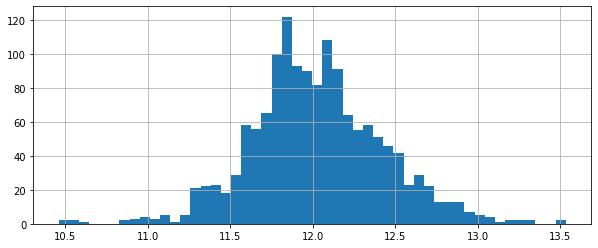

In [26]:
plt.rcParams['figure.figsize']= [10.0, 4.0]

SalePrice.hist(bins=50)


Prob plot for GrLivArea

((array([-3.4943654 , -3.25015084, -3.11507391, ...,  3.11507391,
          3.25015084,  3.4943654 ]),
  array([ 9.27983645,  9.75842362,  9.93984515, ..., 16.73172726,
         16.8598053 , 17.32128438])),
 (0.9604882341117648, 13.167124207725713, 0.9981611302221983))

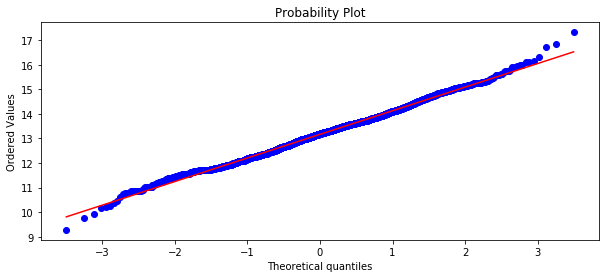

In [27]:
from scipy.stats import probplot
probplot(numeric_df.drop(outliers).GrLivArea, plot=plt)

Prob plot for OveralQual

((array([-3.49454834, -3.25034572, -3.11527604, ...,  3.11527604,
          3.25034572,  3.49454834]),
  array([ 1,  1,  1, ..., 10, 10, 10], dtype=int64)),
 (1.3741883722689823, 6.089071599862967, 0.973753614381352))

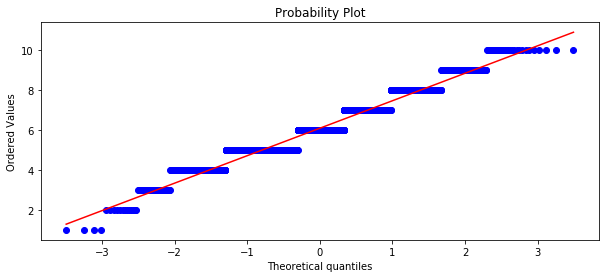

In [28]:
probplot(numeric_df.OverallQual, plot=plt)

Prob plot for SalePrice

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.34550693,
         13.5211395 , 13.53447303])),
 (0.3982622308161888, 12.024050901109383, 0.9953761475636613))

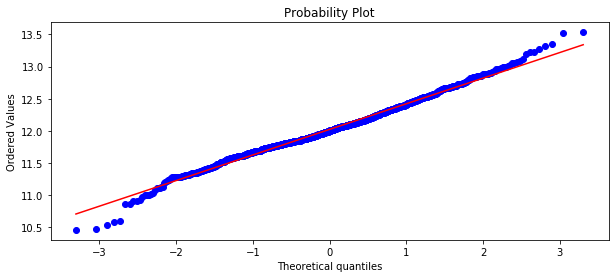

In [29]:
probplot(SalePrice, plot=plt)

GarageCars and GarageArea are highly correlated which will cause multivariabily issue. Since information contained in GarageCars will also reflected in GarageArea, it is ok to drop GarageCars.

numeric_df.drop(columns=['GarageCars'], inplace=True)

In [30]:
# After dummification, we can drop the features that have low variance
cat_dummy = pd.get_dummies(cat_df)

# drop low variance features
low_var = []
for i in cat_dummy.columns:
    dominant = cat_dummy[i].value_counts().apply(lambda x: x/len(cat_dummy[i]))[0]
    if dominant>.9994: low_var.append(i)
cat_dummy.drop(columns=low_var, inplace=True)

In [31]:
feature_dummy = pd.concat([numeric_df, cat_df], axis=1)
feature_dummy = pd.get_dummies(feature_dummy)
print(feature_dummy.shape)
feature_dummy.head()

(2919, 224)


,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,...,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,10,5.831328,19.212182,1,1,3,0.0,7,4,2003,2003,8.059126,2,4,2,4,3,2,11.170327,6,0.0,7.483296,11.692623,0,1,11.692623,11.686189,0.0,13.698888,1.0,0.000000,2,1,3,0.730463,1,2.602594,6,0,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,5,6.221214,19.712205,1,1,3,0.0,6,7,1976,1976,0.000000,3,4,2,4,1,0,12.062832,6,0.0,8.897844,12.792276,0,1,12.792276,0.000000,0.0,12.792276,0.0,0.730463,2,0,3,0.730463,1,2.259674,6,1,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,10,5.914940,20.347241,1,1,0,0.0,7,4,2001,2002,7.646538,2,4,2,4,2,2,10.200343,6,0.0,9.917060,11.892039,0,1,11.892039,11.724598,0.0,13.832085,1.0,0.000000,2,1,3,0.730463,1,2.259674,6,1,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,11,5.684507,19.691553,1,1,0,0.0,7,4,1915,1970,0.000000,3,4,4,1,3,0,8.274266,6,0.0,10.468500,11.354094,2,1,12.013683,11.354094,0.0,13.711364,1.0,0.000000,1,0,3,0.730463,2,2.440268,6,1,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,10,6.314735,21.325160,1,1,0,0.0,8,4,2000,2000,9.391827,2,4,2,4,0,2,10.971129,6,0.0,10.221051,12.510588,0,1,12.510588,12.271365,0.0,14.480029,1.0,0.000000,2,1,4,0.730463,1,2.750250,6,1,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


### Regression Modeling

In [32]:
def get_error(X_train,y_train,X_test,y_test, model, show = True, refit = True):
    if refit: model.fit(X_train, y_train)
    train_error = 1 - r2_score(y_train, model.predict(X_train))
    test_error = 1 - r2_score(y_test,model.predict(X_test))
    if show:
        print("train error ", train_error)
        print("test error", test_error)
    return [train_error, test_error]



In [33]:
train.shape
feature_dummy.shape

(2919, 224)

In [34]:
train_index = train.drop(index=outliers).index
X = feature_dummy.iloc[train_index,]
y = SalePrice[train_index]
print(X.shape)
print(y.shape)

(1458, 224)
(1458,)


In [35]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=108)
X_train.shape

(1166, 224)

#### Ridge Regression

In [36]:
ridge = Ridge(random_state=108, tol=0.0001)

grid_para = dict(alpha = np.linspace(1,20,10))
grid_search_ridge = ms.GridSearchCV(ridge,  cv=5, param_grid=grid_para, n_jobs=-1, verbose=2)
%time grid_search_ridge.fit(X_train,y_train)  
ridge=grid_search_ridge.best_estimator_
print(ridge)
get_error(X_train,y_train,X_test,y_test,ridge, True,False)      

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Wall time: 2.72 s
Ridge(alpha=13.666666666666668, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=108, solver='auto', tol=0.0001)
train error  0.05694405550756787
test error 0.0923420367755694


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.6s finished


[0.05694405550756787, 0.0923420367755694]

#### Lasso Regression

In [37]:
lasso = Lasso(tol=0.001,max_iter=1000, random_state=108)

grid_para = dict(alpha = np.logspace(-5,-3,10))
grid_search_lasso = ms.GridSearchCV(lasso,  cv=5, param_grid=grid_para, n_jobs=-1)
%time grid_search_lasso.fit(X_train,y_train)  # What to call to trigger the gridSearchCV
lasso=grid_search_lasso.best_estimator_
print(lasso)
get_error(X_train,y_train,X_test,y_test,lasso)  

Wall time: 1.61 s
Lasso(alpha=0.0005994842503189409, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=108, selection='cyclic', tol=0.001, warm_start=False)
train error  0.05941871834777901
test error 0.09297345948928037


[0.05941871834777901, 0.09297345948928037]

C:\Users\jtlqh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  """Entry point for launching an IPython kernel.


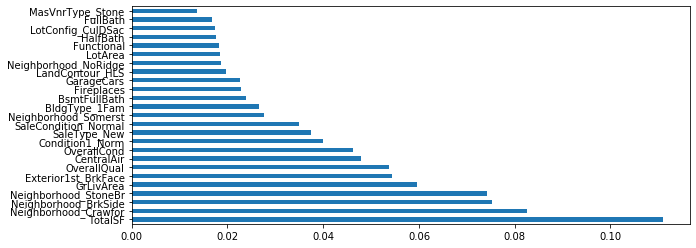

In [38]:
pd.Series(dict(zip(X_train.columns,lasso.coef_))).sort_values(ascending=False)[:25].plot('barh')


#### Random Forest

In [71]:

rf = RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=17,
           max_features=19, max_leaf_nodes=None,
           min_impurity_decrease=1e-06, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0001, n_estimators=202, n_jobs=None,
           oob_score=False, random_state=108, verbose=0, warm_start=False)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())
rf.fit(X_train,y_train)
get_error(X_train,y_train,X_test,y_test,rf)


Parameters currently in use:

{'bootstrap': False,
 'criterion': 'mse',
 'max_depth': 17,
 'max_features': 19,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 1e-06,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0001,
 'n_estimators': 202,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 108,
 'verbose': 0,
 'warm_start': False}
train error  0.0007712982837817517
test error 0.12976531443569528


[0.0007712982837817517, 0.12976531443569528]

Wall time: 4.67 s
RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=17,
           max_features=19, max_leaf_nodes=None,
           min_impurity_decrease=1e-06, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0001, n_estimators=202, n_jobs=None,
           oob_score=False, random_state=108, verbose=0, warm_start=False)
train error  0.0007712982837817517
test error 0.12976531443569528


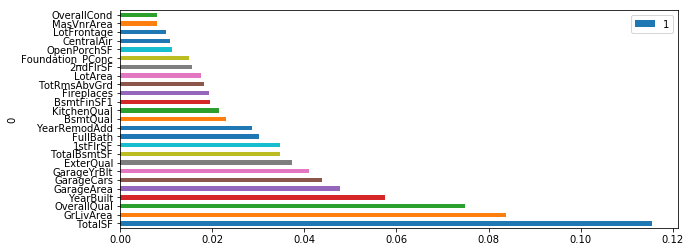

In [40]:
# use dummy dataframe for tree models

# Create the random grid
random_grid = {
               'max_features': range(15,20),
               'max_depth': range(15,20),
               'min_samples_split': [2,3],
               'min_samples_leaf': [1,2],
                'n_estimators': range(200,251,1),
              'min_weight_fraction_leaf':[0.0001],
              'min_impurity_decrease':[0.000001]
}
#pprint(random_grid)

grid_search_forest = ms.RandomizedSearchCV(rf, random_grid, cv = 5, verbose=0, n_jobs = -1, random_state=108)
#grid_search_forest = RandomizedSearchCV(rf, random_grid, cv=5, n_jobs=-1)
%time grid_search_forest.fit(X_train, y_train)   # %time     is ipython magic command to measure the execution timebest_net=grid_search_net.best_estimator_

rf = grid_search_forest.best_estimator_
print(rf)
get_error(X_train,y_train,X_test,y_test,rf)  
importance_forest=(pd.DataFrame(sorted(zip(X_train.columns, rf.feature_importances_), key=lambda x: x[1], reverse=True)))

importance_forest[:25].plot(kind='barh', x=0, y=1)

#### Gradient Boosting Machine

In [72]:
# gradient boosting on label dataframe
gbmr = GradientBoostingRegressor()
interval=1000
n_estimators=41 * interval
gbmr.set_params(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.021544346900318846, loss='ls', max_depth=4,
             max_features=4, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=4500,
             n_iter_no_change=None, presort='auto', random_state=108,
             subsample=0.9, tol=0.1, validation_fraction=0.2, verbose=0,
             warm_start=False)
gbmr.fit(X_train,y_train)
get_error(X_train,y_train,X_test,y_test,gbmr)

train error  0.0041583170519555734
test error 0.09074479354603893


[0.0041583170519555734, 0.09074479354603893]

Wall time: 1min 23s
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.021544346900318846, loss='ls', max_depth=4,
             max_features=4, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=4500,
             n_iter_no_change=None, presort='auto', random_state=108,
             subsample=0.9, tol=0.1, validation_fraction=0.2, verbose=0,
             warm_start=False)
train error  0.0041583170519555734
test error 0.09074479354603893
[0.0041583170519555734, 0.09074479354603893]


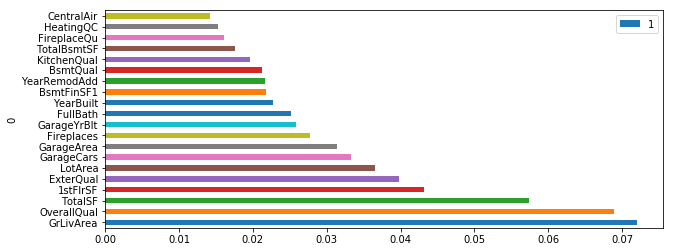

In [42]:
param_grid = {'n_estimators': range(4000,5000,500),
               'max_features': range(3,5),
               'max_depth': range(3,5),
               'min_samples_split': [2],
               'min_samples_leaf': [2],
               'learning_rate': np.logspace(-5,0,10),
                'subsample':[0.9]}
grid_search_gbmr =ms.GridSearchCV(gbmr, param_grid=param_grid, cv=5 ,return_train_score=True,n_jobs=-1)
#print(gbmr.get_params())
%time grid_search_gbmr.fit(X_train,y_train)

gbmr=grid_search_gbmr.best_estimator_
print(gbmr)
#print("best train error ", 1-r2_score(gbmr.predict(X_train), y_train))
#print("best test error ", 1-r2_score(gbmr.predict(X_test), y_test))
print(get_error(X_train, y_train, X_test, y_test, gbmr))

importance_gbmr=pd.DataFrame(sorted(zip(X_train.columns, gbmr.feature_importances_), key=lambda x: x[1], reverse=True))
importance_gbmr[:20].plot(kind='barh', x=0, y=1)

#### Support Vector Machine

In [93]:
svm = SVR(C=16237.76739188721, cache_size=200, coef0=0.0, degree=2, epsilon=0.01,
  gamma=1e-07, kernel='poly', max_iter=-1, shrinking=True, tol=0.001,
  verbose=False)
print(svm)
svm.fit(X_train, y_train)

get_error(X_train,y_train, X_test,y_test,svm, True,False)

SVR(C=16237.76739188721, cache_size=200, coef0=0.0, degree=2, epsilon=0.01,
  gamma=1e-07, kernel='poly', max_iter=-1, shrinking=True, tol=0.001,
  verbose=False)
train error  0.06370069571192805
test error 0.09294313597318982


[0.06370069571192805, 0.09294313597318982]

In [74]:
grid_para_svm = [
    {'C': np.logspace(4,5,5),
     'gamma': [1e-7],#np.linspace(1e-6,1e-5,5),
     'epsilon': [0.01],#np.logspace(-2,0,20),
     'degree': [2],
     'kernel': ['poly']}
]
grid_search_svm = ms.GridSearchCV(svm, param_grid=grid_para_svm, cv=5, return_train_score=True,  n_jobs=-1)
%time grid_search_svm.fit(X_train, y_train)

svm =grid_search_svm.best_estimator_
print(svm)

print(get_error(X_train,y_train, X_test, y_test, svm))


Wall time: 5min 4s
SVR(C=17782.794100389227, cache_size=200, coef0=0.0, degree=2, epsilon=0.01,
  gamma=1e-07, kernel='poly', max_iter=-1, shrinking=True, tol=0.001,
  verbose=False)
train error  0.06320690893987857
test error 0.09234381142366199
[0.06320690893987857, 0.09234381142366199]


#### Xgboost Regression

In [95]:

warnings.filterwarnings('ignore')
xgb = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=0.7, colsample_bytree=0.4, gamma=0,
       importance_type='gain', learning_rate=0.01, max_delta_step=0,
       max_depth=5, min_child_weight=1.1, missing=None, n_estimators=2000,
       n_jobs=-1, nthread=-1, objective='reg:squarederror', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)
print(xgb.get_params())

%time xgb.fit(X_train, y_train, eval_metric='rmse', eval_set=[(X_test, y_test)], early_stopping_rounds=12,verbose=False)
get_error(X_train,y_train,X_test,y_test,xgb, True,False)


{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 0.7, 'colsample_bytree': 0.4, 'gamma': 0, 'importance_type': 'gain', 'learning_rate': 0.01, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 1.1, 'missing': None, 'n_estimators': 2000, 'n_jobs': -1, 'nthread': -1, 'objective': 'reg:squarederror', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
Wall time: 3.02 s
train error  0.015533715468402653
test error 0.09521062695309679


[0.015533715468402653, 0.09521062695309679]

In [46]:
params = {'n_estimators': range(1000,10000,1000), 'max_depth':[5,6,7], 'min_child_weight':[1.1,1.2,1.3] }

grid_search_xgb = ms.GridSearchCV(xgb, params, cv=5, return_train_score=True, n_jobs=-1)
%time grid_search_xgb.fit(X_train, y_train, eval_metric='rmse', eval_set=[(X_test, y_test)], early_stopping_rounds=11,verbose=False)

xgb=grid_search_xgb.best_estimator_
print(xgb)

get_error(X_train,y_train,X_test,y_test,xgb)

Wall time: 7min 10s
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=0.7, colsample_bytree=0.4, gamma=0,
       importance_type='gain', learning_rate=0.01, max_delta_step=0,
       max_depth=5, min_child_weight=1.1, missing=None, n_estimators=2000,
       n_jobs=-1, nthread=-1, objective='reg:squarederror', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)
train error  0.015533715468402653
test error 0.09521062695309679


[0.015533715468402653, 0.09521062695309679]


#### Refit with RobustScaler() on SVM, Ridge, Lasso Models

In [96]:
warnings.filterwarnings('ignore')

#svm = make_pipeline(RobustScaler(), SVR(C=16237.76739188721, cache_size=200, coef0=0.0, degree=2, epsilon=0.01,
#  gamma=5e-03, kernel='poly', max_iter=-1, shrinking=True, tol=0.001,
#  verbose=False))
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas = np.linspace(1,20,10)))
lasso = make_pipeline(RobustScaler(), LassoCV(alphas = np.logspace(-5,-3,10)))


models_name = ['ridge', 'lasso', 'forest', 'gradient boost', 'svm', 'xgboost']

models = [ridge, lasso, rf, gbmr, svm, xgb]
errors = [get_error(X_train, y_train, X_test, y_test, model) for model in models]
errors = pd.DataFrame(errors, index=models_name, columns=['Train_err', 'Test_err'])
errors

train error  0.05624361457048144
test error 0.09276452451302208
train error  0.059139301114205955
test error 0.09335462027891639
train error  0.0007712982837817517
test error 0.12976531443569528
train error  0.0041583170519555734
test error 0.09074479354603893
train error  0.06370069571192805
test error 0.09294313597318982
train error  0.015533715468402653
test error 0.09521062695309679


,Train_err,Test_err
ridge,0.056244,0.092765
lasso,0.059139,0.093355
forest,0.000771,0.129765
gradient boost,0.004158,0.090745
svm,0.063701,0.092943
xgboost,0.015534,0.095211


#### 5 kfold cross verification

In [97]:
ms_k5 = ms.KFold(n_splits=5,shuffle=True,random_state=108)

In [98]:

kscores=[]
for i,model in enumerate(models):
    print(models_name[i])
    kscores.append(ms.cross_val_score(estimator=model, X=X, y=y, cv=ms_k5))

ridge
lasso
forest
gradient boost
svm
xgboost


In [99]:
score_df=pd.DataFrame(kscores,models_name[:6])
mean=score_df.apply(np.mean,axis=1)
std=score_df.apply(np.std,axis=1)
score_df=pd.concat([mean,std],axis=1)
score_df.columns=['mean','std']
score_df

,mean,std
ridge,0.919870,0.008610
lasso,0.921408,0.008936
forest,0.886120,0.010838
gradient boost,0.915835,0.007100
svm,0.914431,0.007472
xgboost,0.916111,0.008126


### Fit Models

In [101]:
for model in models:
    model.fit(X,y)
scores = [r2_score(y,model.predict(X)) for model in models]

In [102]:
# model rmse
pd.Series(dict(zip(models_name, scores)))

ridge             0.938967
lasso             0.938053
forest            0.999038
gradient boost    0.993452
svm               0.933500
xgboost           0.981175
dtype: float64

### SalePrice Prediction

In [103]:
submissions = [x.predict(feature_dummy.tail(test.shape[0])) for x in models]
submissions

[array([11.67153723, 11.91290081, 12.11272231, ..., 12.06240503,
        11.67383873, 12.30837809]),
 array([11.68686944, 11.92802775, 12.11436764, ..., 12.0589367 ,
        11.66913485, 12.32820157]),
 array([11.72936611, 11.94595548, 12.12678544, ..., 11.96834453,
        11.58605705, 12.33187087]),
 array([11.76626661, 11.98889271, 12.16151804, ..., 11.9491013 ,
        11.63366371, 12.26801938]),
 array([11.67099549, 12.07271879, 12.17410864, ..., 12.07422521,
        11.90258597, 12.46071088]),
 array([11.710125 , 11.9633875, 12.147948 , ..., 11.946224 , 11.679252 ,
        12.295294 ], dtype=float32)]

In [104]:
submissions = pd.DataFrame(submissions, index=models_name).T.apply(np.exp).apply(lambda x: np.round(x,1))
submissions.head()

,ridge,lasso,forest,gradient boost,svm,xgboost
0,117188.3,118998.9,124164.9,128832.3,117124.8,121798.7
1,149178.8,151452.6,154192.3,160957.0,175031.1,156903.7
2,182174.9,182474.9,184754.9,191284.7,193708.3,188706.5
3,190691.6,193214.9,184575.8,195597.3,197851.0,191037.7
4,199695.6,200287.4,192725.8,184983.5,199778.8,188530.8


### Blending Models

In [106]:
submissions['blend'] = submissions.apply(np.mean, axis=1).apply(lambda x: np.round(x,1))
submissions.head()

,ridge,lasso,forest,gradient boost,svm,xgboost,blend
0,117188.3,118998.9,124164.9,128832.3,117124.8,121798.7,121351.3
1,149178.8,151452.6,154192.3,160957.0,175031.1,156903.7,157952.6
2,182174.9,182474.9,184754.9,191284.7,193708.3,188706.5,187184.0
3,190691.6,193214.9,184575.8,195597.3,197851.0,191037.7,192161.4
4,199695.6,200287.4,192725.8,184983.5,199778.8,188530.8,194333.7


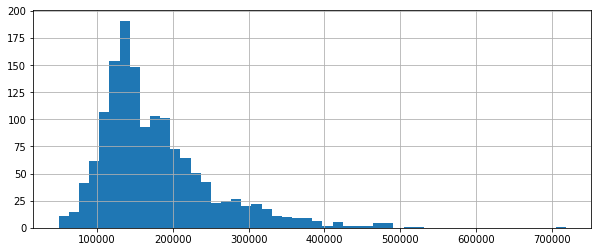

In [107]:
submissions.blend.hist(bins=50)